## Fish market
Database of common fish species for fish market

## About this Dataset
Content
This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# read file or dataset 
data=pd.read_csv("C:/Users/Admin/Downloads/Fish.csv")
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
data.isnull().sum() #  checking null values

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
data['Species'].value_counts() #  check how many differnt species of fish 

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## Correlation

Strength of the relationship between two variables
Lets look at correlation between all features.


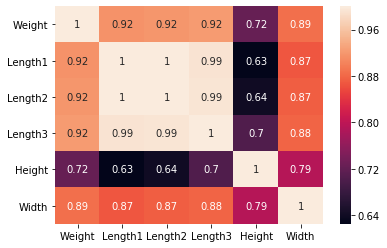

In [7]:
# checking important features though heatmap
import seaborn as sns
sns.heatmap(data.corr(),annot=True,)

In [8]:
important_data=['Species','Length1','Length2','Length3','Height','Width']
X=data[important_data] # all columns or data without target or predict column
y=data.Weight # target data or predict column
print(X)
print(y)

    Species  Length1  Length2  Length3   Height   Width
0     Bream     23.2     25.4     30.0  11.5200  4.0200
1     Bream     24.0     26.3     31.2  12.4800  4.3056
2     Bream     23.9     26.5     31.1  12.3778  4.6961
3     Bream     26.3     29.0     33.5  12.7300  4.4555
4     Bream     26.5     29.0     34.0  12.4440  5.1340
5     Bream     26.8     29.7     34.7  13.6024  4.9274
6     Bream     26.8     29.7     34.5  14.1795  5.2785
7     Bream     27.6     30.0     35.0  12.6700  4.6900
8     Bream     27.6     30.0     35.1  14.0049  4.8438
9     Bream     28.5     30.7     36.2  14.2266  4.9594
10    Bream     28.4     31.0     36.2  14.2628  5.1042
11    Bream     28.7     31.0     36.2  14.3714  4.8146
12    Bream     29.1     31.5     36.4  13.7592  4.3680
13    Bream     29.5     32.0     37.3  13.9129  5.0728
14    Bream     29.4     32.0     37.2  14.9544  5.1708
15    Bream     29.4     32.0     37.2  15.4380  5.5800
16    Bream     30.4     33.0     38.3  14.8604 

In [9]:
X.shape

(159, 6)

In [13]:
# separate categories data 
e=data.iloc[:,0]
print(e.head())

0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: Species, dtype: object


## conveting categories data to numeric data

In [14]:
#label encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
X.iloc[:,0] = label_encoder.fit_transform(X.iloc[:,0]) #LabelEncoder is used to encode the country value


In [15]:
label_encoder.fit_transform(X.iloc[:,0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5], dtype=int64)

In [16]:
label_encoder

LabelEncoder()

In [17]:
X.iloc[:,0]

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
129    3
130    3
131    3
132    3
133    3
134    3
135    3
136    3
137    3
138    3
139    3
140    3
141    3
142    3
143    3
144    3
145    5
146    5
147    5
148    5
149    5
150    5
151    5
152    5
153    5
154    5
155    5
156    5
157    5
158    5
Name: Species, Length: 159, dtype: int64

In [18]:
hot_encoder = OneHotEncoder(categorical_features = [0])
X = hot_encoder.fit_transform(X).toarray()

C:\Users\Admin\.conda\envs\nishant\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\.conda\envs\nishant\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [19]:
hot_encoder.fit_transform(X).toarray()

C:\Users\Admin\.conda\envs\nishant\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\.conda\envs\nishant\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0.    ,  1.    ,  0.    , ..., 30.    , 11.52  ,  4.02  ],
       [ 0.    ,  1.    ,  0.    , ..., 31.2   , 12.48  ,  4.3056],
       [ 0.    ,  1.    ,  0.    , ..., 31.1   , 12.3778,  4.6961],
       ...,
       [ 1.    ,  0.    ,  0.    , ..., 13.8   ,  2.277 ,  1.2558],
       [ 1.    ,  0.    ,  0.    , ..., 15.2   ,  2.8728,  2.0672],
       [ 1.    ,  0.    ,  0.    , ..., 16.2   ,  2.9322,  1.8792]])

In [20]:
OneHotEncoder(categorical_features = [0])

OneHotEncoder(categorical_features=[0], categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [21]:
X

array([[ 1.    ,  0.    ,  0.    , ..., 30.    , 11.52  ,  4.02  ],
       [ 1.    ,  0.    ,  0.    , ..., 31.2   , 12.48  ,  4.3056],
       [ 1.    ,  0.    ,  0.    , ..., 31.1   , 12.3778,  4.6961],
       ...,
       [ 0.    ,  0.    ,  0.    , ..., 13.8   ,  2.277 ,  1.2558],
       [ 0.    ,  0.    ,  0.    , ..., 15.2   ,  2.8728,  2.0672],
       [ 0.    ,  0.    ,  0.    , ..., 16.2   ,  2.9322,  1.8792]])

In [22]:
hot_encoder

OneHotEncoder(categorical_features=[0], categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [23]:
X.shape

(159, 12)

In [24]:
X = X[:, 1:]

In [25]:
# splitintg data train data and test data from dataset. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=1)

In [26]:
y_test.head()

29    1000.0
42     120.0
14     600.0
91     130.0
81      85.0
Name: Weight, dtype: float64

In [27]:
# use Linear regression
# Fitting MLR to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
e=regressor.fit(X_train, y_train)
print(e)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [28]:
regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
y_pred

array([ 766.93900762,  109.24860669,  540.30915139,  200.38611819,
         83.77406638,  594.03009269,  121.03443347,  485.77804732,
         67.59191171,  250.14107983,  181.70598493,  225.06229285,
       -177.28869484,  374.93367395,  715.94402367,  187.10059476,
        191.76996904,  534.46040736,  476.69719788,  312.29978096,
          4.94762006, -173.53927847,  253.69563765,  486.74601124,
        147.89525721,  825.98378208,  581.03081489,  -84.18909947,
       1315.32547121,  206.65384085, 1028.91815727,  375.25230437,
        674.02807414,  357.7993448 ,  509.24494258,  359.14032741,
        141.04616195,  274.83038465,  901.64464647,  350.40113616,
        374.95049462,  653.98692253,  386.15393947,   21.94198552,
        506.86128463,  750.53235142,  -95.29506484,  727.49253278])

In [32]:
X_test

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , 33.5   ,
        37.    , 42.6   , 18.957 ,  6.603 ],
       [ 0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    , 19.4   ,
        21.    , 23.7   ,  6.1146,  3.2943],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , 29.4   ,
        32.    , 37.2   , 14.9544,  5.1708],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    , 20.5   ,
        22.5   , 24.    ,  5.856 ,  3.624 ],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    , 18.2   ,
        20.    , 21.    ,  5.082 ,  2.772 ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , 31.    ,
        33.5   , 38.7   , 14.4738,  5.7276],
       [ 0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    , 20.5   ,
        22.    , 24.3   ,  6.6339,  3.5478],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , 28.7   ,
        31.    , 36.2   , 14.3714,  4.8146],
       [ 0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    , 19.    ,
 

In [33]:
X_train

array([[ 0.    ,  0.    ,  0.    , ..., 30.6   ,  8.568 ,  4.7736],
       [ 0.    ,  1.    ,  0.    , ..., 41.4   , 11.1366,  6.003 ],
       [ 0.    ,  0.    ,  1.    , ..., 45.8   ,  7.786 ,  5.1296],
       ...,
       [ 0.    ,  1.    ,  0.    , ...,  8.8   ,  2.112 ,  1.408 ],
       [ 0.    ,  0.    ,  1.    , ..., 55.1   ,  8.9262,  6.1712],
       [ 0.    ,  0.    ,  0.    , ..., 21.2   ,  5.5756,  2.9044]])

In [34]:
y_test.head()

29    1000.0
42     120.0
14     600.0
91     130.0
81      85.0
Name: Weight, dtype: float64

In [35]:
y_pred.shape

(48,)

In [36]:
y_train.head()

53     272.0
117    650.0
136    540.0
17     700.0
77     100.0
Name: Weight, dtype: float64

In [37]:
(abs(y_test-y_pred)).describe()

count     48.000000
mean      84.277460
std       60.446161
min        1.225934
25%       44.215992
50%       73.525496
75%      119.853756
max      234.674529
Name: Weight, dtype: float64

In [38]:
regressor.score(X_train, y_train)

0.9427556492750395

In [39]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred)) # *RMSE ( root mean square error)
r2 = r2_score(y_test,y_pred) # r^2: R-squared is the proportion of variance explained
print('rmse:',rmse)
print('r2:',r2) 

rmse: 103.34558062611455
r2: 0.9096349552643738


In [40]:
data.describe(include ='all') 

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,56,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,NaN,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,NaN,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,NaN,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,NaN,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,NaN,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
